In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import StandardScaler

In [2]:
cd /Users/slitasov/Econometrics_project/Econometrics_project/data

/Users/slitasov/Econometrics_project/Econometrics_project/data


In [3]:
df = pd.read_csv('data_watches.csv')

In [4]:
df.head(5)

,Цена,Объем постоянной памяти,Сенсорный дисплей,Яркость,Управление музыкальным плеером,Функция поиска смартфона,Емкость аккумулятора,"Время работы в режиме ожидания, до","Время работы в обычном режиме, до",Вес,...,Датчик снятия с руки,Премиальный Бренд,Длина,Ширина,Высота,Размер дисплея,Разрешение дисплея 1,Разрешение дисплея 2,Название,Ссылка
0,7990.0,0.13,1.0,2000.0,1.0,0.0,300.000000,240.0,120.0,26.0,...,0.0,0.0,38.09,45.94,11.2,1.91,320.0,380.0,"Смарт-часы AMAZFIT Bip 5 A2215, 1.91"", розовый",https://www.citilink.ru/product/smart-chasy-am...
1,7990.0,0.13,1.0,2000.0,1.0,0.0,300.000000,240.0,120.0,26.0,...,0.0,0.0,38.09,45.94,11.2,1.91,320.0,380.0,"Смарт-часы AMAZFIT Bip 5 A2215, 1.91"", белый",https://www.citilink.ru/product/smart-chasy-am...
2,126990.0,16.00,1.0,2000.0,1.0,1.0,401.302885,384.0,75.0,70.0,...,0.0,0.0,47.00,47.00,14.5,1.30,416.0,416.0,"Смарт-часы Garmin Epix Gen 2 Sapphire, 33.02м...",https://www.citilink.ru/product/smart-chasy-ga...
3,123990.0,16.00,1.0,2000.0,1.0,1.0,401.302885,384.0,75.0,70.0,...,0.0,0.0,47.00,47.00,14.5,1.30,416.0,416.0,"Смарт-часы Garmin Epix Gen 2 Sapphire, 33.02м...",https://www.citilink.ru/product/smart-chasy-ga...
4,62990.0,16.00,1.0,2000.0,1.0,1.0,401.302885,216.0,24.0,51.0,...,0.0,0.0,43.60,43.60,12.6,1.30,416.0,416.0,"Смарт-часы Garmin Venu 2 Plus, 33мм, 1.3"", ...",https://www.citilink.ru/product/smart-chasy-ga...


### Анализ описательных статистик и построение графиков

In [5]:
# Определение переменных

# Регрессоры
X = df.loc[:, ~df.columns.isin(['Название', 'Цена', 'Ссылка'])]
X['const'] = 1 # Добавление константы

# Описание всех переменных
descr = X.describe()

# Количественные переменные
quant_var = list(descr.loc['max', :][descr.loc['max', :] != 1].index)

# Dummy переменные
dummy_var = list(descr.loc['max', :][descr.loc['max', :] == 1].index)

# Целевая переменная - цена часов
y = df['Цена']

/var/folders/lk/9zv1w_2d5hdg9ylw9l7v5_w00000gn/T/ipykernel_25507/1332603768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['const'] = 1 # Добавление константы


- Анализ количественных переменных

In [6]:
desc_stats = df[quant_var].describe()
desc_stats

,Объем постоянной памяти,Яркость,Емкость аккумулятора,"Время работы в режиме ожидания, до","Время работы в обычном режиме, до",Вес,Объем оперативной памяти,Время зарядки,Частота процессора,Длина,Ширина,Высота,Размер дисплея,Разрешение дисплея 1,Разрешение дисплея 2
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.00000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,12.343185,1915.315315,410.498874,352.821496,149.628700,45.857568,290.297586,121.315945,834.00000,41.895856,55.157658,13.052162,1.440045,317.139640,328.752252
std,8.285114,340.600534,166.992901,397.301653,149.923498,14.290896,668.935114,44.354921,253.20126,6.836511,45.153526,7.441095,0.219896,108.632151,110.443601
min,0.000512,450.000000,90.000000,25.000000,6.000000,21.000000,0.064000,1.500000,20.00000,3.600000,25.000000,1.500000,0.540000,128.000000,128.000000
25%,4.000000,2000.000000,300.000000,120.000000,48.000000,36.800000,32.000000,115.083916,832.00000,40.000000,42.500000,10.800000,1.300000,240.000000,240.000000
50%,16.000000,2000.000000,401.302885,290.547085,114.571429,45.000000,32.000000,115.083916,832.00000,41.700000,46.000000,12.400000,1.430000,260.000000,320.000000
75%,16.000000,2000.000000,470.000000,336.000000,192.000000,52.000000,56.000000,120.000000,832.00000,45.900000,48.000000,14.500000,1.500000,416.000000,450.000000
max,32.000000,2000.000000,850.000000,3336.000000,672.000000,120.000000,4096.000000,300.000000,1700.00000,83.000000,268.000000,118.000000,2.300000,480.000000,502.000000


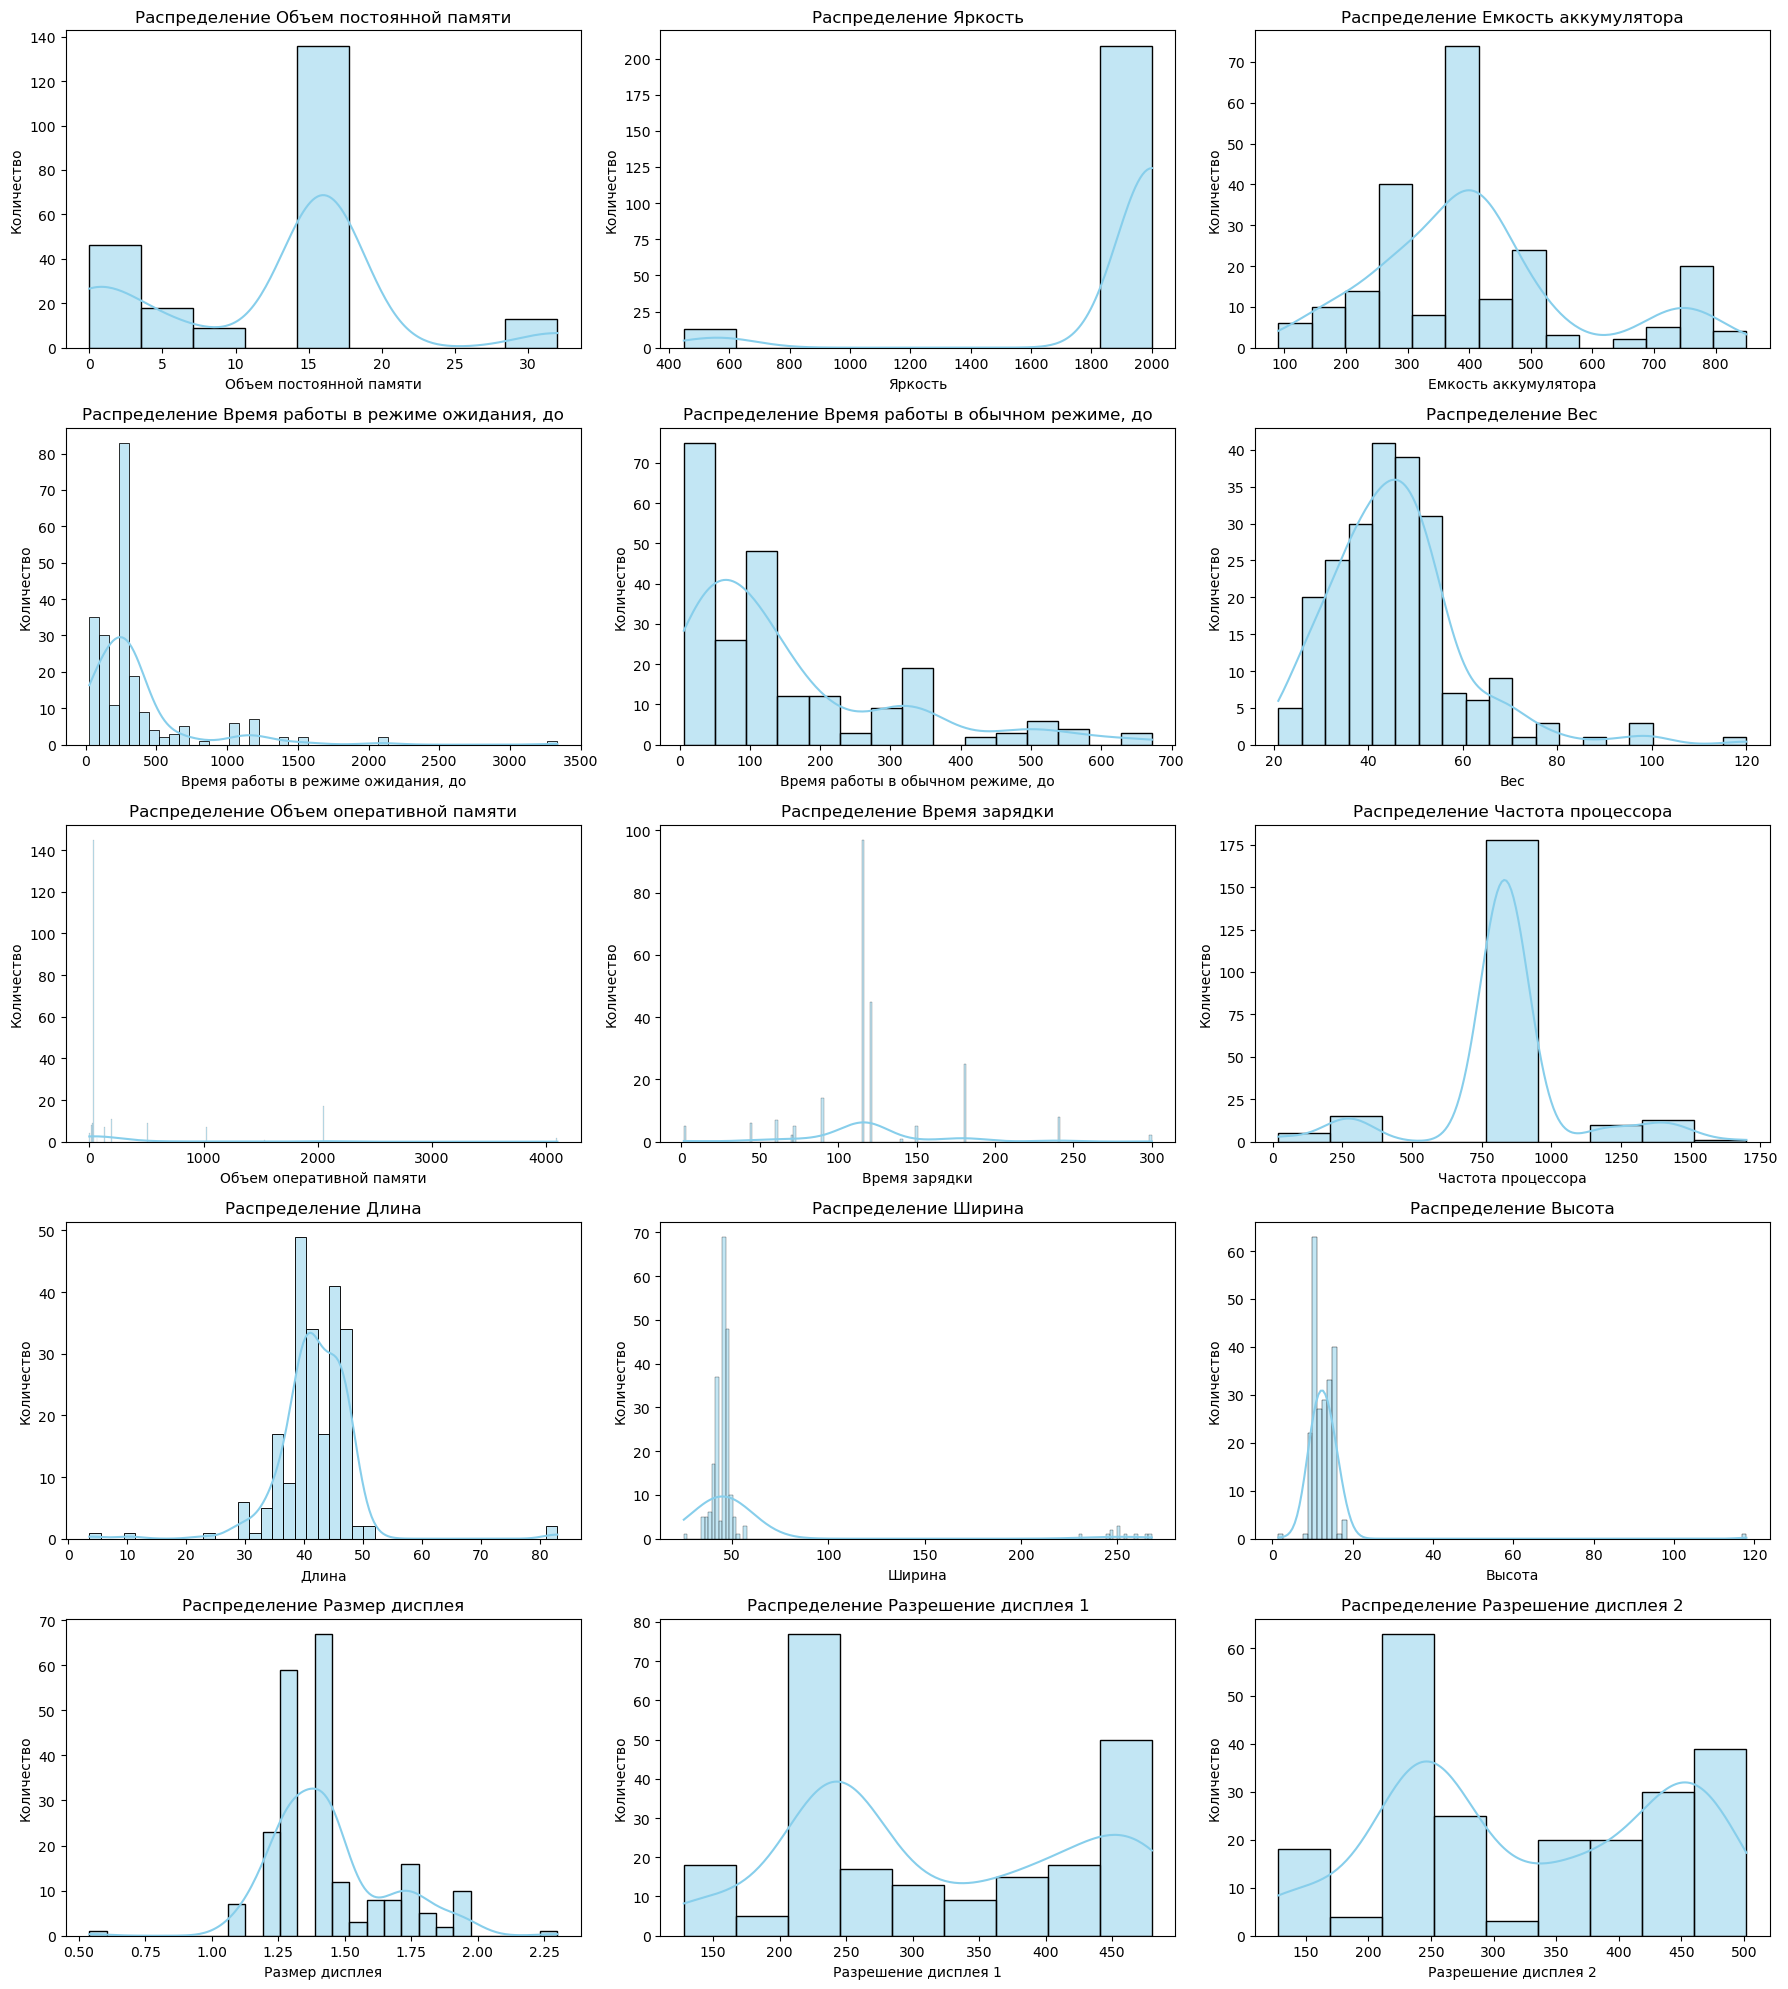

In [7]:
num_vars = len(quant_var)
num_rows = (num_vars + 2) // 3  

plt.figure(figsize=(18, 4 * num_rows))

for i, column in enumerate(quant_var, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Количество')
    
plt.tight_layout()
plt.show()

- Распределение объема постоянной памяти:

а) Большинство значений сосредоточено около 5 единиц, что предполагает наиболее распространенный размер постоянной памяти.

б) Вид распределения показывает, что есть и другие значимые пики около 15 и 25 единиц, что может указывать на разные модели или версии устройств с разным объемом памяти.

- Распределение Яркости:

а) Пик находится в районе 400 единиц яркости, что может быть типичным стандартом яркости экрана.

б) Распределение достаточно сильно скошено вправо, что указывает на наличие устройств с высокими значениями яркости.

- Распределение Емкости аккумулятора:

а) Большая часть значений сосредоточена около 400 единиц емкости, что, является стандартной емкостью аккумуляторов.

б) Помимо основного пика, существуют меньшие пики около 200 и 600 единиц, что может отражать наличие разных версий устройств с различной емкостью батарей.

- Время работы в режиме ожидания:

а) Большинство устройств имеет очень короткое время работы в режиме ожидания, с наибольшим количеством значений около 100-200 часов.

б) Распределение быстро убывает, что указывает на небольшое количество устройств, способных работать в режиме ожидания более длительное время.

- Время работы в обычном режиме:

а) Для этого режима характерно более широкое распределение времени работы, с максимальным количеством наблюдений около 100-150 часов.

- Распределение Веса:

а) Вес устройств в основном распределен в узком диапазоне, с максимальной частотой значений около 40-60 грамм. Это говорит о том, что большинство смарт-часов имеют схожий вес, оптимизированный для комфортного ношения.

In [8]:
data_subset = df[quant_var]

# Нормализуем данные
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_subset)

# Создаем и обучаем модель KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_normalized)

# Посчитаем средние для каждого кластера
kmeans_labels = kmeans.labels_
df['kmeans_cluster_label'] = kmeans_labels
clustered_data = pd.DataFrame(data_normalized, columns=quant_var)
clustered_data['kmeans_cluster_label'] = kmeans_labels
cluster_means = clustered_data.groupby('kmeans_cluster_label').mean()
cluster_means_original_scale = scaler.inverse_transform(cluster_means)
cluster_means_df = pd.DataFrame(cluster_means_original_scale, columns=quant_var)


print(df['kmeans_cluster_label'].value_counts()) 
cluster_means_df

/Users/slitasov/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmeans_cluster_label
0    104
1    103
2     15
Name: count, dtype: int64


,Объем постоянной памяти,Яркость,Емкость аккумулятора,"Время работы в режиме ожидания, до","Время работы в обычном режиме, до",Вес,Объем оперативной памяти,Время зарядки,Частота процессора,Длина,Ширина,Высота,Размер дисплея,Разрешение дисплея 1,Разрешение дисплея 2
0,9.217876,1971.153846,436.444018,212.380605,66.271978,48.086538,142.385231,139.841581,769.961538,41.667308,65.213942,14.869615,1.377981,234.423077,241.307692
1,14.655612,1846.601942,383.724608,325.347468,181.517337,41.790097,477.262136,101.824700,898.951456,41.886214,46.694660,11.102330,1.529612,413.097087,431.174757
2,18.133333,2000.000000,414.462500,1515.200000,508.600000,58.333333,32.000000,126.711422,832.000000,43.546667,43.546667,13.840000,1.255333,231.733333,231.733333


Признаки с наибольшей разницей между кластерами:
Index([2, 0, 1], dtype='int64')


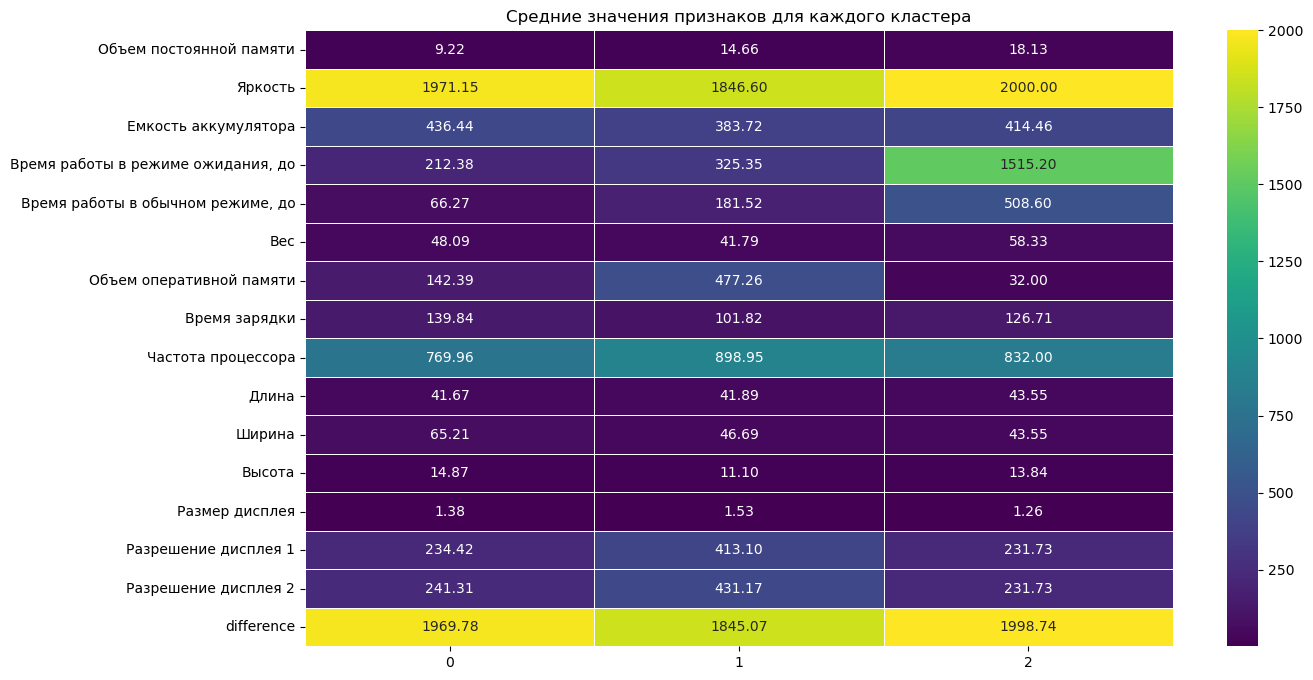

In [9]:
cluster_means_df['difference'] = cluster_means_df.max(axis=1) - cluster_means_df.min(axis=1)
cluster_means_df_sorted = cluster_means_df.sort_values(by='difference', ascending=False)

top_different_features = cluster_means_df_sorted.head(3).index
print("Признаки с наибольшей разницей между кластерами:")
print(top_different_features)

cluster_means_df_transposed = cluster_means_df.T

plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means_df_transposed, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Средние значения признаков для каждого кластера')
plt.show()

- Кластер 0:

а) Низкая производительность: Наименьшая частота процессора и небольшой объем оперативной памяти.

б) Длительное время работы в режиме ожидания: Это может указывать на то, что часы этого кластера оптимизированы для энергосбережения.

в) Средняя емкость аккумулятора и яркость: Часы могут быть более ориентированы на базовое использование с достаточной автономностью.

- Кластер 1: 

а) Высокая производительность и емкость: Это отражается в значительно большей частоте процессора и большом объеме оперативной памяти.

б) Сильная яркость экрана: Указывает на наличие качественного дисплея, подходящего для использования в различных условиях освещения.

в) Баланс между временем работы в обычном и ожидаемом режимах: Способность поддерживать достаточно долгую работу без подзарядки в обоих режимах, делает эти устройства универсальными.

- Кластер 2: 

а) Наибольший объем памяти: Отличительной чертой является значительно больший объем как постоянной, так и оперативной памяти, что подходит для мультимедийных функций и сложных приложений.

б) Высокая производительность: Самая высокая частота процессора среди всех кластеров, что подчеркивает способность к быстрой и эффективной обработке данных.

в) Меньшее время работы в режиме ожидания: При большей функциональности и мощности, время работы в режиме ожидания у этих часов меньше, что может указывать на более высокое энергопотребление.

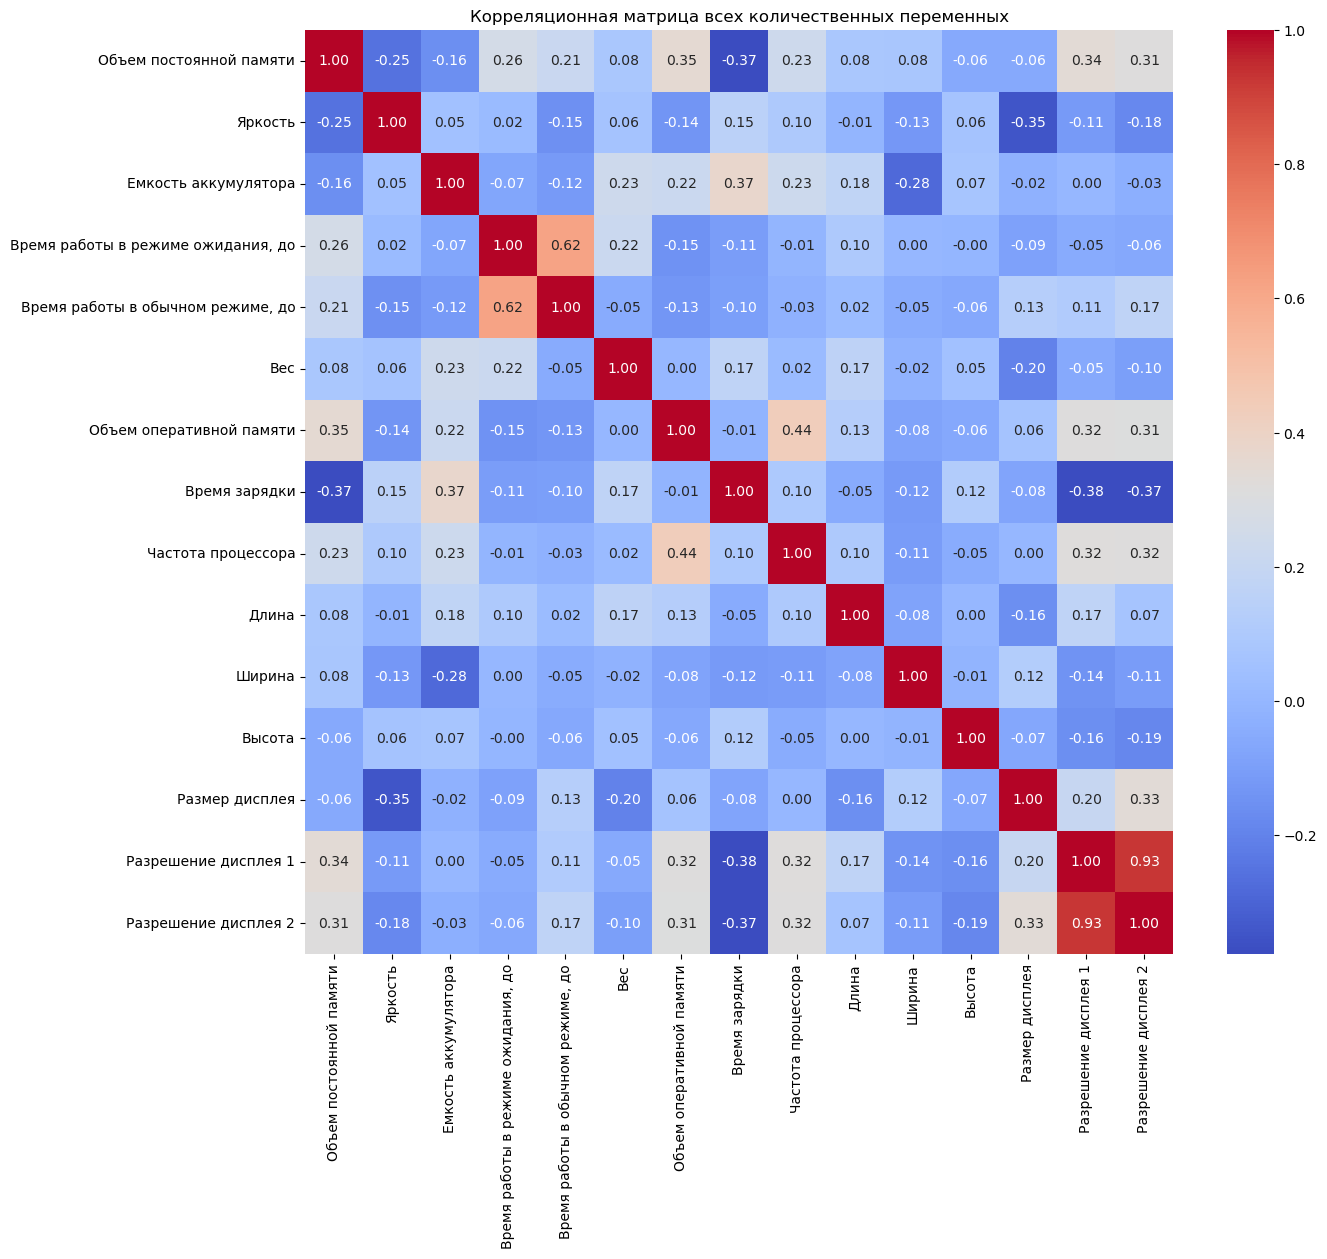

In [10]:
correlation_matrix = df[quant_var].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица всех количественных переменных')
plt.show()


Сильные коррелляции:

- Объем постоянной памяти и объем оперативной памяти (0.35): Это означает, что устройства с большим объемом постоянной памяти часто оснащаются и большим объемом оперативной памяти.
- Время работы в обычном режиме и время работы в режиме ожидания (0.62): Указывает на то, что устройства с более длительным временем работы в одном из режимов склонны к более длительной работе и в другом.
- Разрешение дисплея 1 и разрешение дисплея 2 (0.93): Предполагает, что данные два параметра фактически отражают одну и ту же характеристику разных способов измерения или отображения.

- Анализ Dummy-переменных

In [11]:
dummy_var

['Сенсорный дисплей',
 'Управление музыкальным плеером',
 'Функция поиска смартфона',
 'Функция быстрой зарядки',
 'Измерение артериального давления',
 'Автояркость',
 'Датчик снятия с руки',
 'Премиальный Бренд',
 'const']

In [12]:
dummy_var.pop(-1)

'const'

In [13]:
dummy_var

['Сенсорный дисплей',
 'Управление музыкальным плеером',
 'Функция поиска смартфона',
 'Функция быстрой зарядки',
 'Измерение артериального давления',
 'Автояркость',
 'Датчик снятия с руки',
 'Премиальный Бренд']

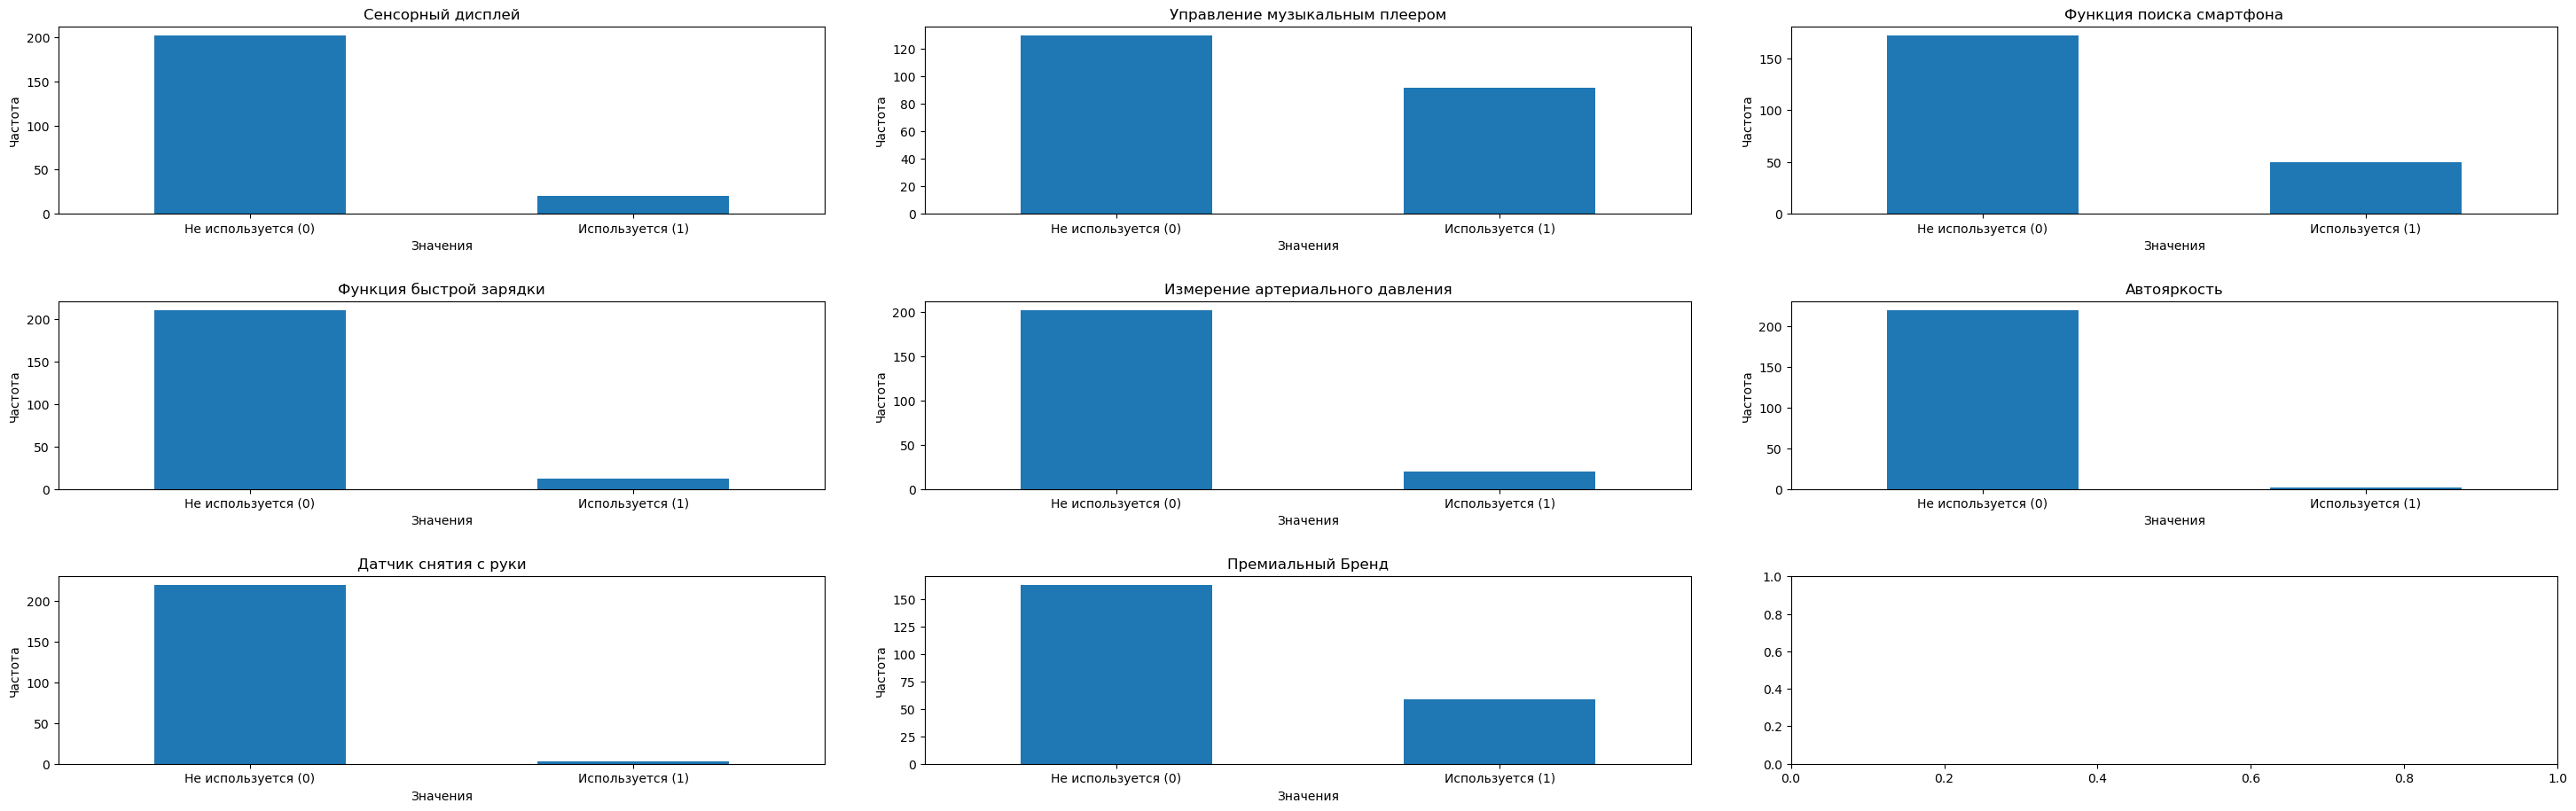

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 10))
fig.tight_layout(pad=5.0)

for ax, column in zip(axes.flatten(), dummy_var):
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{column}')
    ax.set_xlabel('Значения')
    ax.set_ylabel('Частота')
    ax.set_xticklabels(['Не используется (0)', 'Используется (1)'], rotation=0)

plt.show()

- Почти все смарт-часы оснащены функциями, связанными с мониторингом здоровья (например, измерение артериального давления) и повышением удобства использования (например, быстрая зарядка и управление музыкальным плеером). 

- Значительное количество смарт-часов связано с премиальными брендами